## Data Preprocessing

### Importing Libraries Used

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


import string
import emoji
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Loading Dataset

In [3]:
df = pd.read_csv('reviews_2.csv')

### Defining all stopwords used

In [4]:
# Since the reviews are mixed between Indonesian and English, therefore the stopwords used are a combination from both
stopwords_all = stopwords.words("indonesian") + stopwords.words("english")

# Defining other stopwords that are not common but used a lot in reviews/daily interactions 
stopwords_baru = ['sih', 'nya', 'iya', 'tah', 'ok', 'oke','bagus', 'eh', 'nya', 'jelek', 'coba', 'kecewa', 'banget', 'kayak', 'semoga', 'buruk', 'gue', 'kali', 'pas', 'mulu',
                  'sebelah', 'langsung', 'suka', 'maaf', 'sih', 'nya', 'di', 'ada', 'tempat', 'untuk', 'yang', 'ini', 'lagi', 'ya',
                  'saja', 'kok', 'deh', 'kalau', 'dan', 'kan', 'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo','kalo', 'amp', 'biar',
                  'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 
                  'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&amp', 'yah', 'ni', 'lg', 'tapi',
                  'bisa', 'tah', 'ya', 'sy', 'aku', 'dong', 'ud', 'dr', 'mn', 'km', "blibli"]
stopwords_all = stopwords_all + stopwords_baru

### Data Cleaning

The raw data from the reviews are usually full of emojis, unnecessary punctuations and digits, and also words that will not be beneficial in gaining information. Therefore, the data needs to be cleaned first before used. 

The data also needs to be labeled correctly based on its sentiments. To do this, we are going to label based on the ratings in which (0-2) star ratings will be considered negative sentiments and >=3 are positive sentiments. 

In [5]:
# function to remove unnecessary data and replacing some based on kamus alay dictionary (grabbed from Github)
def preprocess(s):
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s) 
    s = s.lower()
    s = re.sub(r'&gt|&lt', ' ', s)
    # letter repetition (if more than 2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # non-word repetition (if more than 1)
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # phrase repetition
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)
    s = ' '.join([kamus_alay_dict.get(w, w) for w in s.split()])
    
    return s.strip()

In [8]:
kamus_alay = pd.read_csv('new_kamusalay.csv', encoding="ISO-8859-1", header=None)

kamus_alay.loc[len(kamus_alay.index)] = ['onkir', 'ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['blanja', 'belanja'] 
kamus_alay.loc[len(kamus_alay.index)] = ['uninstal', 'uninstall'] 
kamus_alay.loc[len(kamus_alay.index)] = ['exsis', 'eksis'] 
kamus_alay.loc[len(kamus_alay.index)] = ['verivikasi', 'verifikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['recomended', 'recommended'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bajuz', 'bagus'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gw', 'gue'] 
kamus_alay.loc[len(kamus_alay.index)] = ['casback', 'cashback'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlwod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mw', 'mau'] 
kamus_alay.loc[len(kamus_alay.index)] = ['chasbcak', 'cashback']
kamus_alay.loc[len(kamus_alay.index)] = ['puazzz', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['puaaas', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mmbntu', 'membantu'] 
kamus_alay.loc[len(kamus_alay.index)] = ['diblibli', 'blibli'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gratong', 'gratis ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['cust', 'customer'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bibli', 'blibli']
kamus_alay.loc[len(kamus_alay.index)] = ['mncul', 'muncul']
kamus_alay.loc[len(kamus_alay.index)] = ['enag', 'enak']
kamus_alay.loc[len(kamus_alay.index)] = ['tlong', 'tolong']
kamus_alay.loc[len(kamus_alay.index)] = ['goodapp', 'good app']
kamus_alay.loc[len(kamus_alay.index)] = ['addres', 'address']
kamus_alay.loc[len(kamus_alay.index)] = ['adlh', 'adalah']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiny', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasix', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiyg', 'aplikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['aplikask', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikaso', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplilasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplk', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplkasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aamsung', 'samsung']
kamus_alay.loc[len(kamus_alay.index)] = ['apl', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['cant', "can't"]

indonesian_lexicon = pd.read_csv('lexicon.csv', encoding="ISO-8859-1", header=None)
indonesian_lexicon= indonesian_lexicon[[0, 1]]

frames = [kamus_alay, indonesian_lexicon]
  
kamus = pd.concat(frames)

In [9]:
kamus_alay_dict = {}
for i, row in kamus.iterrows():
  kamus_alay_dict[row[0]] = row[1]

In [10]:
bins = [0, 2, 5]
names = ['Negative', 'Positive']

exclist = string.digits + string.punctuation

# function used to remove stopwords that have been compiled 
def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_all]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_all]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# function used to remove special characters
def remove_special_characters(oldtext, remove_digits=True):
    table_ = str.maketrans(exclist, ' '*len(exclist))
    newtext = ' '.join(oldtext.translate(table_).split())
    return newtext

# function used to remove emoji
def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)


# function used to clean data from dataset
def clean_data(df):
    
    # feature selection
    filtered = pd.DataFrame(df, columns=['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at'])
    
    # replacing missing data 
    filtered["reviewCreatedVersion"].fillna("missing", inplace=True)
    
    # dropping data and resetting index
    filtered.dropna(inplace=True)
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    # applying functions to remove punctuations, digits, and emojis
    filtered['content']=filtered['content'].apply(remove_special_characters)
    filtered['content']=filtered['content'].apply(give_emoji_free_text)

    # resetting index again
    filtered = filtered.dropna()
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    
    for indices, row in filtered.iterrows():
        sentence = preprocess(filtered['content'][indices])
        filtered['content'][indices] = sentence
    
    # data labeling
    filtered['sentiment'] = pd.cut(filtered['score'], bins, labels=names)
    
    
    # removing unnecessary data based on length
    filtered['content'] = filtered['content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
    filtered['content'] = filtered['content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<12]))
    
    # putting reviews in lowercase, and removing stopwords
    filtered['content'] = filtered['content'].str.lower()
    filtered['content'] = filtered['content'].apply(remove_stopwords)
    
    # removing reviews that now have no data inside of them after being filtered
    filtered = filtered.replace(r'^\s*$', np.NaN, regex=True)
    filtered = filtered.dropna()
    filtered =  filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    return filtered


df = clean_data(df)

<ipython-input-10-151fbb58732c>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['content'][indices] = sentence


In [13]:
neg_df = df[df['sentiment'] == 'Negative']
neg_df

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,sentiment
0,A B C,aplikasinya pejabat harga diskon promosinya me...,1,0,missing,2021-12-29 15:19:11,Negative
2,Bahrul Alamsyah,proses refund saldo menunggu pikir belanja pak...,1,0,8.3.5,2021-12-29 13:55:51,Negative
6,Agus Nurrohmad,pesan otomatis dibatalakan chat hasil,1,0,8.3.5,2021-12-29 12:10:44,Negative
7,Annisa Aprianti hartono,unduh terus belanja pesan batalkan blipay nona...,1,0,missing,2021-12-29 12:07:01,Negative
14,Alpha Xborg,gratis ongkos kirim khayalan,1,0,8.3.5,2021-12-29 09:36:01,Negative
...,...,...,...,...,...,...,...
118993,Yoseptian Gonta,proses lambat view produk butuh detik beda app...,2,0,1.2.1,2014-01-21 09:37:26,Negative
118999,Ichsan Winyetra,slow good,1,1,1.2.1,2013-12-25 10:49:43,Negative
119000,denny parulian,maybe tim aware thing forgotten password apps,2,0,1.2.1,2013-12-22 16:53:45,Negative
119002,Paramitta Sekar,can't access collection menu uninstall,1,0,1.2,2013-12-15 15:54:45,Negative


## Filtering Data Based on Pos Tag

POS tagging is the process of marking up a word in a corpus to a corresponding part of a speech tag, based on its context and definition. Filtering based on its POS tag is used to filter out unnecessary word like adjectives, pronouns, and to collect words that are in noun or verb form (to help in getting topics later on). 

In [23]:
tag_list = ['NN', 'NNS', 'NNP', 'NNPS', 'VBP', 'VBN', 'VBZ', 'VBG', 'VBD', 'WP']

def remove_punctuation_and_stopwords(text):
    llist = []
    sms_no_punctuation = [ch for ch in text if ch not in string.punctuation]
    tokens = "".join(sms_no_punctuation).split()

    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in tokens if word.lower() not in stopwords_all]
    
    tagged = nltk.pos_tag(sms_no_punctuation_no_stopwords)
    for word, tag in tagged: 
        if (tag in tag_list):
            llist.append(word)
    
    return llist

In [16]:
df_reviews = neg_df.copy()

In [17]:
df_reviews= df_reviews.replace(r'^\s*$', np.NaN, regex=True)

In [18]:
df_reviews = df_reviews.reset_index()

In [19]:
df_reviews = df_reviews.dropna()

In [20]:
df_reviews = df_reviews.drop(columns=['index'], axis = 1)

In [21]:
df_reviews = df_reviews.rename(columns={'content': 'reviews'})

In [22]:
df_reviews

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment
0,A B C,aplikasinya pejabat harga diskon promosinya me...,1,0,missing,2021-12-29 15:19:11,Negative
1,Bahrul Alamsyah,proses refund saldo menunggu pikir belanja pak...,1,0,8.3.5,2021-12-29 13:55:51,Negative
2,Agus Nurrohmad,pesan otomatis dibatalakan chat hasil,1,0,8.3.5,2021-12-29 12:10:44,Negative
3,Annisa Aprianti hartono,unduh terus belanja pesan batalkan blipay nona...,1,0,missing,2021-12-29 12:07:01,Negative
4,Alpha Xborg,gratis ongkos kirim khayalan,1,0,8.3.5,2021-12-29 09:36:01,Negative
...,...,...,...,...,...,...,...
21138,Yoseptian Gonta,proses lambat view produk butuh detik beda app...,2,0,1.2.1,2014-01-21 09:37:26,Negative
21139,Ichsan Winyetra,slow good,1,1,1.2.1,2013-12-25 10:49:43,Negative
21140,denny parulian,maybe tim aware thing forgotten password apps,2,0,1.2.1,2013-12-22 16:53:45,Negative
21141,Paramitta Sekar,can't access collection menu uninstall,1,0,1.2,2013-12-15 15:54:45,Negative


In [24]:
# applying the pos tag function to dataset
df_reviews['noun'] = df_reviews['reviews'].apply(remove_punctuation_and_stopwords)

## Data Vectorization
Data vectorization is by using bag-of-words. The bag-of-words model converts text into fixed-length vectors by counting how many times each word appears.

In [25]:
df = df_reviews.copy()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(df['reviews'])

In [27]:
bow_data = bow_transformer.transform(df['reviews'])

In [28]:
bow_data.shape

(21143, 12920)

In [29]:
bow_transformer.get_feature_names()

['aapaan',
 'aaya',
 'abad',
 'abadi',
 'abai',
 'abal',
 'abal²',
 'abang',
 'abbis',
 'abcswf',
 'abdul',
 'abdullah',
 'abhisin',
 'abil',
 'abjadnya',
 'abrik',
 'absen',
 'aburadul',
 'acak',
 'acakadut',
 'acak²an',
 'acara',
 'accepted',
 'acces',
 'accesnya',
 'accesories',
 'access',
 'accessories',
 'account',
 'aceh',
 'ach',
 'achiles',
 'acih',
 'acount',
 'acountnya',
 'acssg',
 'acting',
 'action',
 'activator',
 'activity',
 'actor',
 'acxqa',
 'adaan',
 'adab',
 'adah',
 'adakah',
 'adakan',
 'adalh',
 'adamitranya',
 'adaptoprnya',
 'adasih',
 'adat',
 'adaz',
 'adblock',
 'added',
 'adding',
 'address',
 'adds',
 'adel',
 'adidas',
 'adik',
 'adil',
 'adilbuka',
 'adios',
 'adit',
 'aditya',
 'admin',
 'adminnya',
 'adminya',
 'adnan',
 'adoh',
 'adooh',
 'aduan',
 'aduh',
 'aduhj',
 'advan',
 'advance',
 'advert',
 'advertised',
 'advertising',
 'advise',
 'adware',
 'aeon',
 'aera',
 'aerostreet',
 'aesuai',
 'aflikasi',
 'aflikasinya',
 'aftersales',
 'afypy',
 'a

### Bag of Words Frequency Visualization
From the visualization, the words that are common already looks like topics that could be used. 

<AxesSubplot:ylabel='word'>

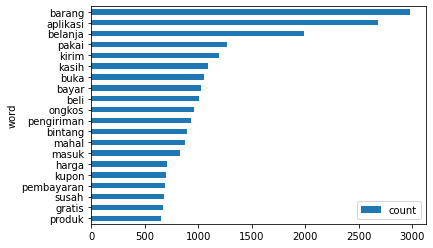

In [30]:
# most frequent words
word_count = pd.DataFrame({'word': bow_transformer.get_feature_names(), 'count': np.asarray(bow_data.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

## LDA (LatentDirichAllocation)

In [33]:
from sklearn.decomposition import LatentDirichletAllocation
import joblib

In [35]:
lda = LatentDirichletAllocation(n_components = 10)
lda.fit_transform(bow_data)
joblib.dump(lda, 'lda_pos_2.pkl')

# buat buka: lda = joblib.load('lda_pos_2.pkl')

['lda_pos_2.pkl']

In [36]:
lda.fit_transform(bow_data)
lda_output = lda.fit_transform(bow_data)

array([[0.00833339, 0.00833382, 0.00833723, ..., 0.00833447, 0.00833447,
        0.58616459],
       [0.57867853, 0.0100002 , 0.01000066, ..., 0.01000016, 0.0100003 ,
        0.01000042],
       [0.4937415 , 0.02000251, 0.02000439, ..., 0.34621282, 0.02000162,
        0.02000829],
       ...,
       [0.24954032, 0.02000666, 0.02000272, ..., 0.02000039, 0.39046944,
        0.02000411],
       [0.0200042 , 0.02000845, 0.02000196, ..., 0.0200007 , 0.41998706,
        0.02001052],
       [0.01000085, 0.01000831, 0.01000082, ..., 0.01000269, 0.9099838 ,
        0.0100002 ]])

In [38]:
lda_output.shape

(21143, 10)

In [39]:
# function to print top words from LDA model 
def print_top_words(model, bow_transformer, n_top_words):
    feature_names = bow_transformer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [40]:
print_top_words(lda, bow_transformer, n_top_words=10)


Topic #0: barang belanja sesuai lengkap pesan barangnya online produk harga toko

Topic #1: kredit kartu cilan pakai paylater pembayaran bank poin limit credit

Topic #2: tukar mohon mencari lambat fitur produk note alamat kasih terima

Topic #3: bayar pakai belanja kupon refund ribet aplikasi promo dana pembayaran

Topic #4: barang pengiriman beli seller proses chat order customer menunggu belanja

Topic #5: kirim ongkos mahal gratis harga belanja poin murah harganya indonesia

Topic #6: masuk dibuka login aplikasi susah akun email daftar data unduh

Topic #7: error aplikasinya payah apps bermasalah install server dibuka pakai berat

Topic #8: aplikasi iklan update anjing muncul mengganggu sampah iklannya hadiah habis

Topic #9: buka bintang kasih aplikasi lemot eror barang belanja perbaiki mencoba



In [48]:
# function to show topics based on matrix
def show_topics(vectorizer=bow_transformer, lda_model=lda, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=bow_transformer, lda_model=lda, n_words=20)        

# Assigning it to dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,barang,belanja,sesuai,lengkap,pesan,barangnya,online,produk,harga,toko,mantap,habis,beda,order,beli,cancel,stok,konsumen,kupon,cari
Topic 1,kredit,kartu,cilan,pakai,paylater,pembayaran,bank,poin,limit,credit,menarik,transfer,kuota,game,cil,spin,mudah,tolak,beli,jualan
Topic 2,tukar,mohon,mencari,lambat,fitur,produk,note,alamat,kasih,terima,samsung,hitam,diperbaiki,tolong,cari,rumah,daerah,benci,perbaiki,aplikasi
Topic 3,bayar,pakai,belanja,kupon,refund,ribet,aplikasi,promo,dana,pembayaran,dibatalkan,masuk,saldo,blipay,menyesal,mending,cashback,batalin,transaksi,beli
Topic 4,barang,pengiriman,beli,seller,proses,chat,order,customer,menunggu,belanja,cepat,respon,aplikasi,status,dikirim,produk,lambat,service,pesan,fitur
Topic 5,kirim,ongkos,mahal,gratis,harga,belanja,poin,murah,harganya,indonesia,ongkirnya,biaya,toko,pengiriman,mending,barangnya,point,pakai,kena,lazada
Topic 6,masuk,dibuka,login,aplikasi,susah,akun,email,daftar,data,unduh,muncul,crash,verifikasi,salah,kesalahan,kode,gal,force,mohon,memasuki
Topic 7,error,aplikasinya,payah,apps,bermasalah,install,server,dibuka,pakai,berat,koneksi,diperbaiki,tampilan,android,kalah,hapus,sulit,susah,kebuka,aplikasinyya
Topic 8,aplikasi,iklan,update,anjing,muncul,mengganggu,sampah,iklannya,hadiah,habis,lumayan,goblok,pasang,tol,ganggu,orang,dasar,penipu,kontol,cari
Topic 9,buka,bintang,kasih,aplikasi,lemot,eror,barang,belanja,perbaiki,mencoba,loading,terima,aplikasinya,susah,parah,cari,lancar,server,malas,produk


### From the dataframe above, the 10 topics and words in each topic looks similar to each other. From this, we can assign each topic with labels manually. 

In [69]:
LDA_topics_theme = ['barang','kredit','pencarian','pembayaran','order','ongkir', 'akun','app performance',
                'iklan','error']

df_topic_keywords['topic_theme'] = LDA_topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,barang,kredit,pencarian,pembayaran,order,ongkir,akun,app performance,iklan,error
Word 0,barang,kredit,tukar,bayar,barang,kirim,masuk,error,aplikasi,buka
Word 1,belanja,kartu,mohon,pakai,pengiriman,ongkos,dibuka,aplikasinya,iklan,bintang
Word 2,sesuai,cilan,mencari,belanja,beli,mahal,login,payah,update,kasih
Word 3,lengkap,pakai,lambat,kupon,seller,gratis,aplikasi,apps,anjing,aplikasi
Word 4,pesan,paylater,fitur,refund,proses,harga,susah,bermasalah,muncul,lemot
Word 5,barangnya,pembayaran,produk,ribet,chat,belanja,akun,install,mengganggu,eror
Word 6,online,bank,note,aplikasi,order,poin,email,server,sampah,barang
Word 7,produk,poin,alamat,promo,customer,murah,daftar,dibuka,iklannya,belanja
Word 8,harga,limit,kasih,dana,menunggu,harganya,data,pakai,hadiah,perbaiki
Word 9,toko,credit,terima,pembayaran,belanja,indonesia,unduh,berat,habis,mencoba


In [71]:
v = lda_output
v = v*100
len(v)

21143

In [72]:
df_topic_keywords.T.columns

Index(['barang', 'kredit', 'pencarian', 'pembayaran', 'order', 'ongkir',
       'akun', 'app performance', 'iklan', 'error'],
      dtype='object', name='topic_theme')

In [74]:
LDA_df = pd.DataFrame(v,columns=df_topic_keywords.T.columns)

In [75]:
LDA_df

topic_theme,barang,kredit,pencarian,pembayaran,order,ongkir,akun,app performance,iklan,error
0,38.201214,0.833354,0.833355,0.833356,0.833396,46.380299,0.833428,9.584704,0.833456,0.833438
1,1.000111,1.000008,1.000012,90.999429,1.000295,1.000099,1.000010,1.000011,1.000004,1.000021
2,2.000233,2.000068,2.000001,61.998498,2.001646,2.000001,2.000035,21.999248,2.000135,2.000135
3,1.666876,1.666729,1.666707,57.110109,1.666787,1.666887,29.555568,1.666900,1.666694,1.666742
4,3.333333,3.333333,3.333333,36.665890,3.333333,36.667443,3.333333,3.333333,3.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...
21138,0.667020,0.666688,32.453199,0.666778,34.153480,0.666675,0.666706,7.577734,0.666690,21.815029
21139,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
21140,2.000000,2.000000,2.000000,2.000000,28.986033,2.000000,35.011991,22.001976,2.000000,2.000000
21141,2.000088,2.000117,2.000229,39.346370,2.000123,2.000138,23.109502,23.542511,2.000754,2.000168


## Topic Mapping
Since we have assigned topics to labels manually, we can map each data into a label. To do this, we can compute the confidence of category prediction based on distribution in the list. 

In [76]:
# To compute the confidence score of category prediction based on the numerical distribution of values in the list
def computeConfidence(similarityList):
    
    similarScores = set(similarityList) 
    highest = max(similarScores)
    
    similarScores.remove(highest)
    if (len(similarScores) == 0):
        return 0
    
    secondHighest = max(similarScores)
    
    return (highest - secondHighest)/ (highest)

In [77]:
dominant_topic = np.nanargmax(LDA_df.values, axis=1)

LDA_df['confidence'] = LDA_df.apply (lambda row: computeConfidence(row), axis=1)
LDA_df['dominant_topic'] = dominant_topic

In [78]:
final = pd.concat([df,LDA_df[['dominant_topic','confidence']]],axis=1)
final

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence
0,A B C,aplikasinya pejabat harga diskon promosinya me...,1,0,missing,2021-12-29 15:19:11,Negative,"[aplikasinya, pejabat, harga, diskon, promosin...",5,0.176348
1,Bahrul Alamsyah,proses refund saldo menunggu pikir belanja pak...,1,0,8.3.5,2021-12-29 13:55:51,Negative,"[proses, refund, menunggu, pikir, belanja, gap...",3,0.989008
2,Agus Nurrohmad,pesan otomatis dibatalakan chat hasil,1,0,8.3.5,2021-12-29 12:10:44,Negative,"[otomatis, dibatalakan, chat, hasil]",3,0.645165
3,Annisa Aprianti hartono,unduh terus belanja pesan batalkan blipay nona...,1,0,missing,2021-12-29 12:07:01,Negative,"[belanja, blipay, saldo, aduh, nyaman]",3,0.482481
4,Alpha Xborg,gratis ongkos kirim khayalan,1,0,8.3.5,2021-12-29 09:36:01,Negative,"[gratis, khayalan]",5,0.000042
...,...,...,...,...,...,...,...,...,...,...
21138,Yoseptian Gonta,proses lambat view produk butuh detik beda app...,2,0,1.2.1,2014-01-21 09:37:26,Negative,"[proses, lambat, view, produk, butuh, detik, b...",4,0.049784
21139,Ichsan Winyetra,slow good,1,1,1.2.1,2013-12-25 10:49:43,Negative,[],0,0.000000
21140,denny parulian,maybe tim aware thing forgotten password apps,2,0,1.2.1,2013-12-22 16:53:45,Negative,"[thing, forgotten, password, apps]",6,0.172111
21141,Paramitta Sekar,can't access collection menu uninstall,1,0,1.2,2013-12-15 15:54:45,Negative,"[access, collection, menu, uninstall]",3,0.401660


In [80]:
# Converting dominant topics numbers to labels
def label_theme(row):
    if (row['dominant_topic'] > len(LDA_topics_theme) or row['dominant_topic'] < 0):
        return ""
    return LDA_topics_theme[int(row['dominant_topic'])]

final['dominant_topic_theme'] = final.apply (lambda row: label_theme(row), axis=1)
final.head()

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence,dominant_topic_theme
0,A B C,aplikasinya pejabat harga diskon promosinya me...,1,0,missing,2021-12-29 15:19:11,Negative,"[aplikasinya, pejabat, harga, diskon, promosin...",5,0.176348,ongkir
1,Bahrul Alamsyah,proses refund saldo menunggu pikir belanja pak...,1,0,8.3.5,2021-12-29 13:55:51,Negative,"[proses, refund, menunggu, pikir, belanja, gap...",3,0.989008,pembayaran
2,Agus Nurrohmad,pesan otomatis dibatalakan chat hasil,1,0,8.3.5,2021-12-29 12:10:44,Negative,"[otomatis, dibatalakan, chat, hasil]",3,0.645165,pembayaran
3,Annisa Aprianti hartono,unduh terus belanja pesan batalkan blipay nona...,1,0,missing,2021-12-29 12:07:01,Negative,"[belanja, blipay, saldo, aduh, nyaman]",3,0.482481,pembayaran
4,Alpha Xborg,gratis ongkos kirim khayalan,1,0,8.3.5,2021-12-29 09:36:01,Negative,"[gratis, khayalan]",5,0.000042,ongkir


In [84]:
final[['reviews', 'dominant_topic_theme']].sample(10)

,reviews,dominant_topic_theme
11100,pengiriman let pilih gosend sameday berubah re...,order
1582,enakan shopee barangnya murah² vocher gratis o...,ongkir
4866,ampas,pembayaran
20383,bodoh hpku,akun
15538,setiap loding trhenti terus lihat barangnya to...,error
18353,ulang tahun harganya heboh taunya hoaks cancel...,ongkir
17575,belanja deleting chat,pembayaran
1920,grts ongkos kirim,ongkir
18780,sekian belanja berharap tekait penangan kompla...,order
3995,bodong,app performance


## Saving Labeled Data to CSV file

In [85]:
final.to_csv('topic_negative.csv', index=False)

In [86]:
data = pd.read_csv('topic_negative.csv')
data

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence,dominant_topic_theme
0,A B C,aplikasinya pejabat harga diskon promosinya me...,1,0,missing,2021-12-29 15:19:11,Negative,"['aplikasinya', 'pejabat', 'harga', 'diskon', ...",5,0.176348,ongkir
1,Bahrul Alamsyah,proses refund saldo menunggu pikir belanja pak...,1,0,8.3.5,2021-12-29 13:55:51,Negative,"['proses', 'refund', 'menunggu', 'pikir', 'bel...",3,0.989008,pembayaran
2,Agus Nurrohmad,pesan otomatis dibatalakan chat hasil,1,0,8.3.5,2021-12-29 12:10:44,Negative,"['otomatis', 'dibatalakan', 'chat', 'hasil']",3,0.645165,pembayaran
3,Annisa Aprianti hartono,unduh terus belanja pesan batalkan blipay nona...,1,0,missing,2021-12-29 12:07:01,Negative,"['belanja', 'blipay', 'saldo', 'aduh', 'nyaman']",3,0.482481,pembayaran
4,Alpha Xborg,gratis ongkos kirim khayalan,1,0,8.3.5,2021-12-29 09:36:01,Negative,"['gratis', 'khayalan']",5,0.000042,ongkir
...,...,...,...,...,...,...,...,...,...,...,...
21138,Yoseptian Gonta,proses lambat view produk butuh detik beda app...,2,0,1.2.1,2014-01-21 09:37:26,Negative,"['proses', 'lambat', 'view', 'produk', 'butuh'...",4,0.049784,order
21139,Ichsan Winyetra,slow good,1,1,1.2.1,2013-12-25 10:49:43,Negative,[],0,0.000000,barang
21140,denny parulian,maybe tim aware thing forgotten password apps,2,0,1.2.1,2013-12-22 16:53:45,Negative,"['thing', 'forgotten', 'password', 'apps']",6,0.172111,akun
21141,Paramitta Sekar,can't access collection menu uninstall,1,0,1.2,2013-12-15 15:54:45,Negative,"['access', 'collection', 'menu', 'uninstall']",3,0.401660,pembayaran
